In [2]:
import pandas as pd

In [3]:
df=pd.read_csv(r"D:\zomato_rating_prediction\notebooks\data\zomato.csv")

In [4]:
###check how many null value preent
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [5]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [6]:
## shape of data
df.shape

(51717, 17)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [8]:
## column in dataet
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [10]:
### remove duplicate value
df.duplicated().sum()

371

In [11]:
## we have 371 duplicated value o firt drop it
df.drop_duplicates(inplace=True)

In [12]:
##removing null values
df.isnull().sum()

online_order                       0
book_table                         0
rate                            7520
votes                              0
location                          19
rest_type                        225
dish_liked                     27751
cuisines                          43
approx_cost(for two people)      341
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [13]:
df['rate'].isnull().sum()

7520

In [14]:
##rate will be our target column so at firt change into float
df = df.loc[df['rate'] != 'NEW']
df = df.loc[df['rate'] != '-']
df['rate']=df['rate'].str.replace("","")
df['rate']=df['rate'].str.replace("-","NaN")
df['rate']=df['rate'].fillna('NaN')
df['rate']=df['rate'].apply(lambda x:str(x).replace("/5",""))



In [15]:
df['rate']=df['rate'].astype(float)

In [16]:
df['rate'].isnull().sum()

7520

In [51]:
df['rate'].describe()

count    41186.000000
mean         3.701765
std          0.439929
min          1.800000
25%          3.400000
50%          3.700000
75%          4.000000
max          4.900000
Name: rate, dtype: float64

now rename ome fields

In [52]:
df=df.rename(columns={"approx_cost(for two people)":"avg_cost",
"listed_in(type)":"meal_type","listed_in(city)":"city"})

In [53]:
df

,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,avg_cost,meal_type,city
0,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet,Banashankari
2,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet,Banashankari
4,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...
51709,No,No,3.7,34,Whitefield,"Casual Dining, Bar",NaN,"North Indian, Continental",800,Pubs and bars,Whitefield
51711,No,No,2.5,81,Whitefield,"Casual Dining, Bar","Biryani, Andhra Meal","Andhra, South Indian, Chinese, North Indian",800,Pubs and bars,Whitefield
51712,No,No,3.6,27,Whitefield,Bar,NaN,Continental,"1,500",Pubs and bars,Whitefield
51715,No,Yes,4.3,236,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500",Pubs and bars,Whitefield


In [56]:
df.isnull().sum()

online_order        0
book_table          0
rate                0
votes               0
location            0
rest_type           0
dish_liked      17968
cuisines            0
avg_cost            0
meal_type           0
city                0
dtype: int64

In [22]:
df.shape

(41186, 11)

. Data Visualization

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

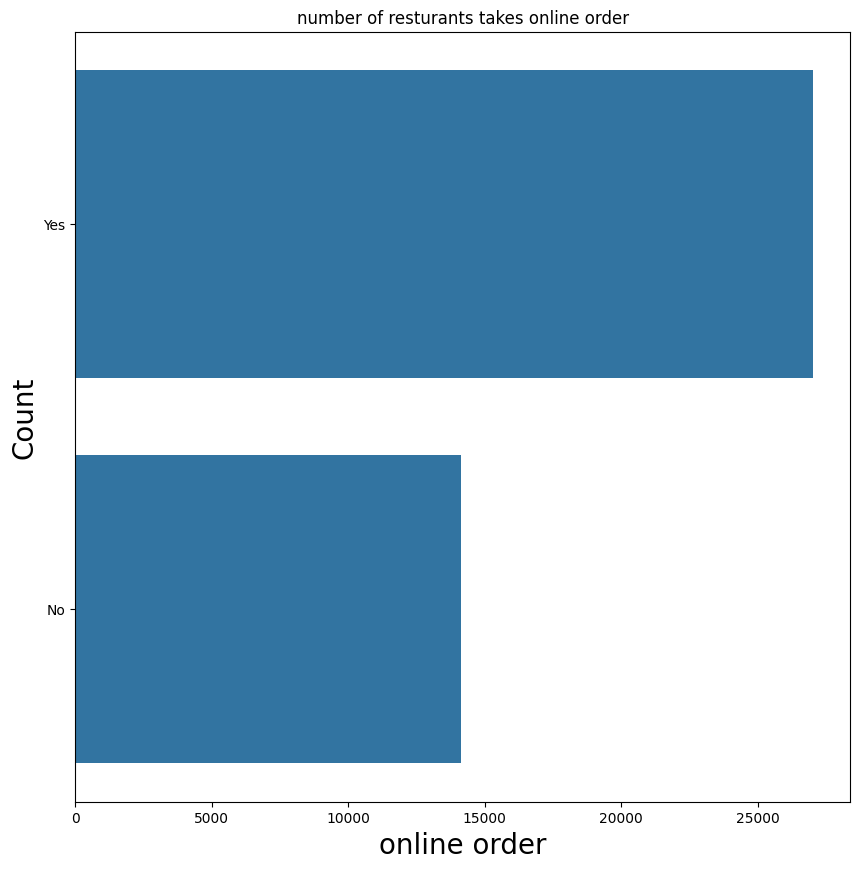

In [24]:
plt.figure(figsize=(10,10))
sns.countplot(df["online_order"])
plt.title("number of resturants takes online order")
plt.xlabel("online order",fontsize=20)
plt.ylabel("Count",fontsize=20)
plt.show()

 Number of restaurants with meal type

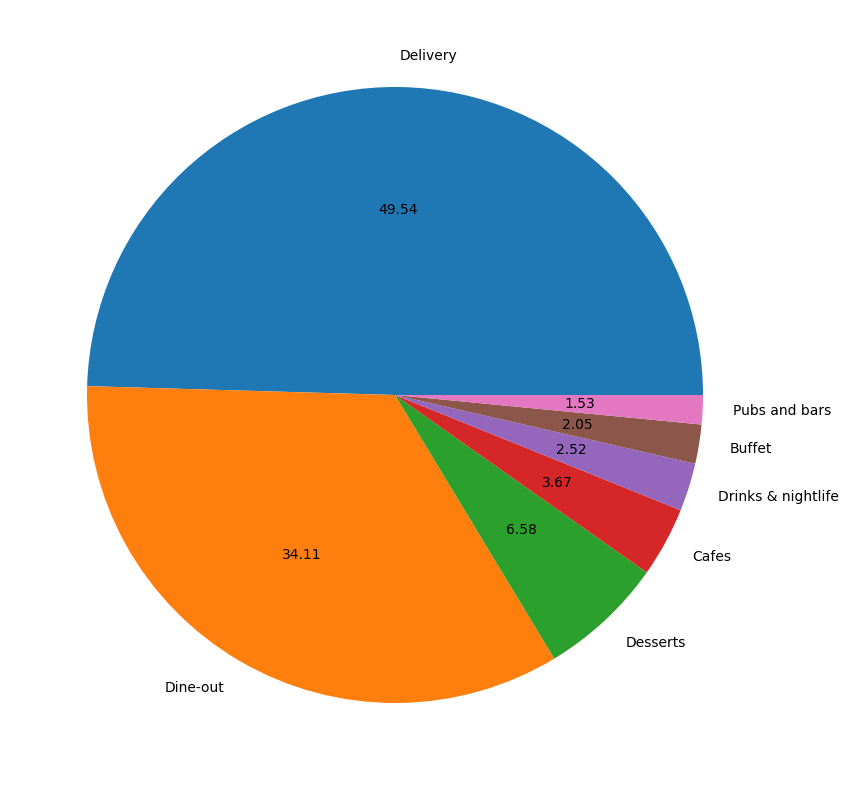

In [25]:
plt.figure(figsize=(10,10))
ax=df.meal_type.value_counts()
labels=df['meal_type'].value_counts().index
plt.pie(ax,labels=labels,autopct='%.2f')
plt.show()

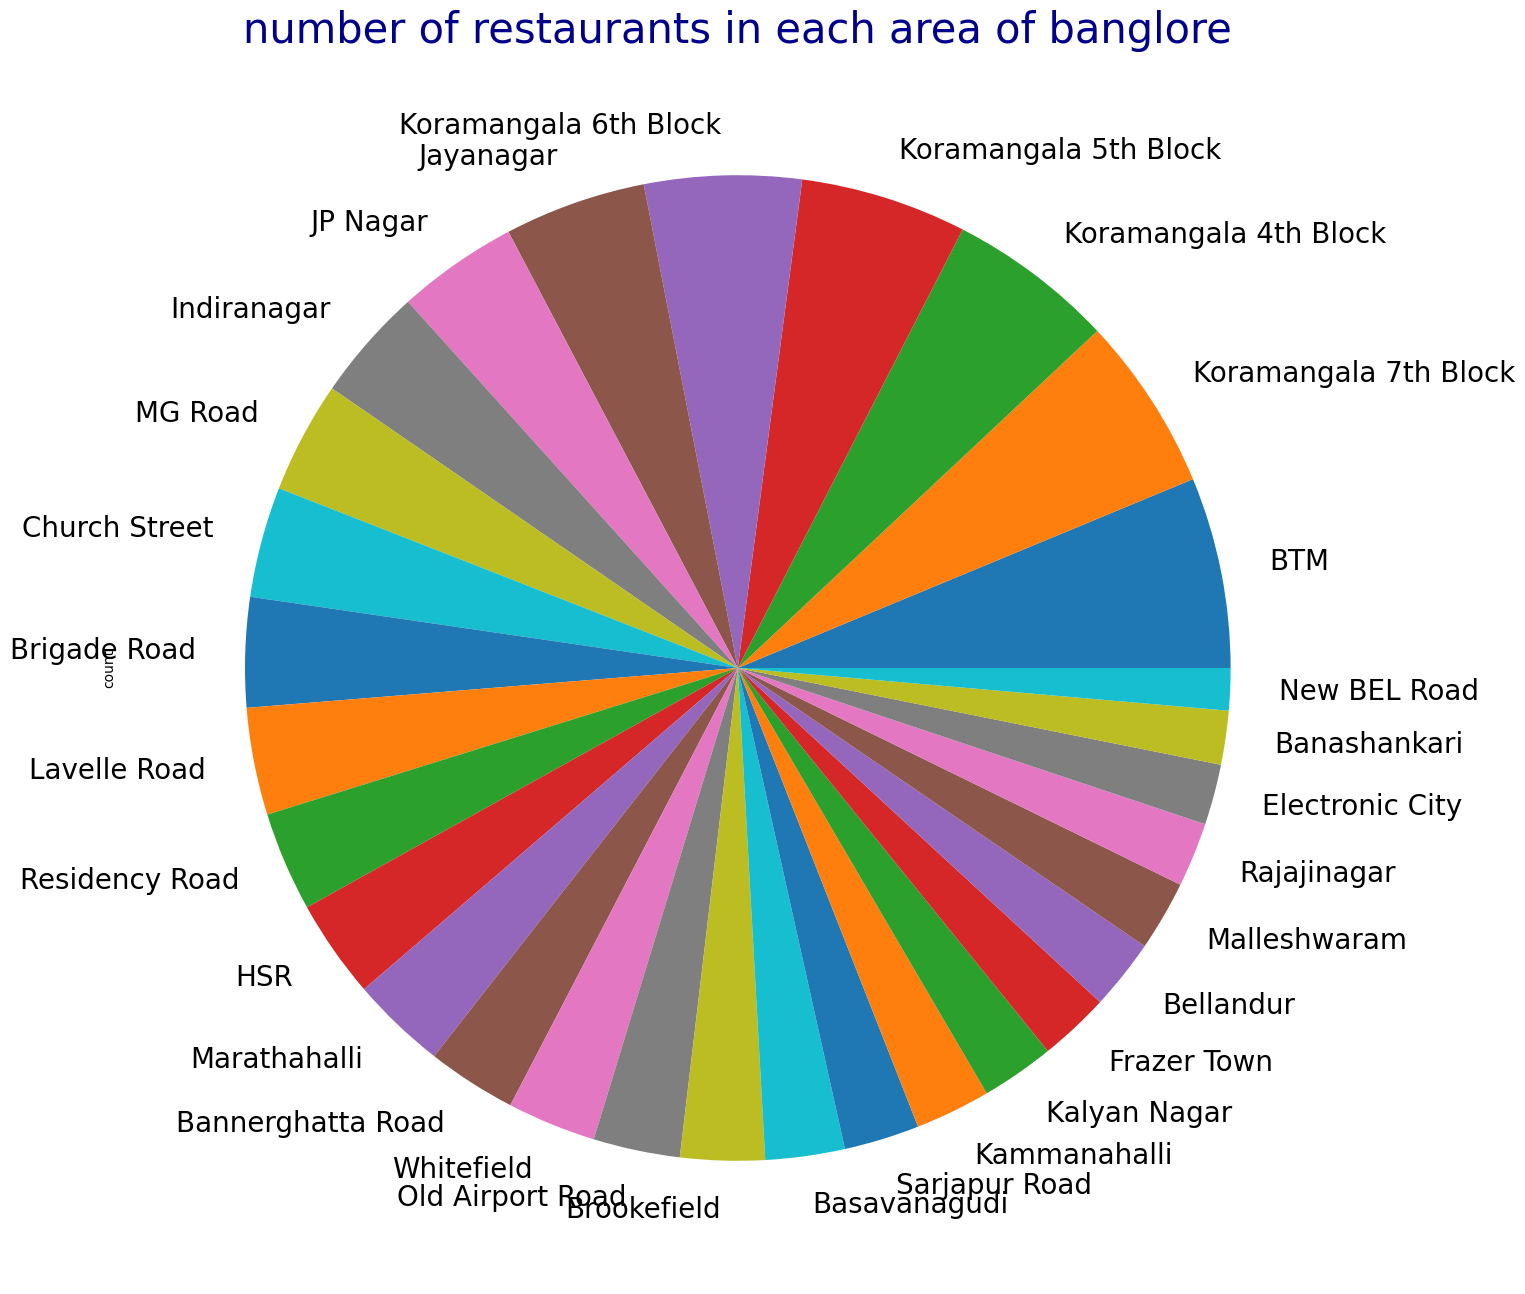

In [26]:
plt.figure(figsize=(16,16))

ax=df.city.value_counts()
ax.plot(kind='pie',fontsize=20)

plt.title('number of restaurants in each area of banglore',fontsize=30,color='darkblue')
plt.show()

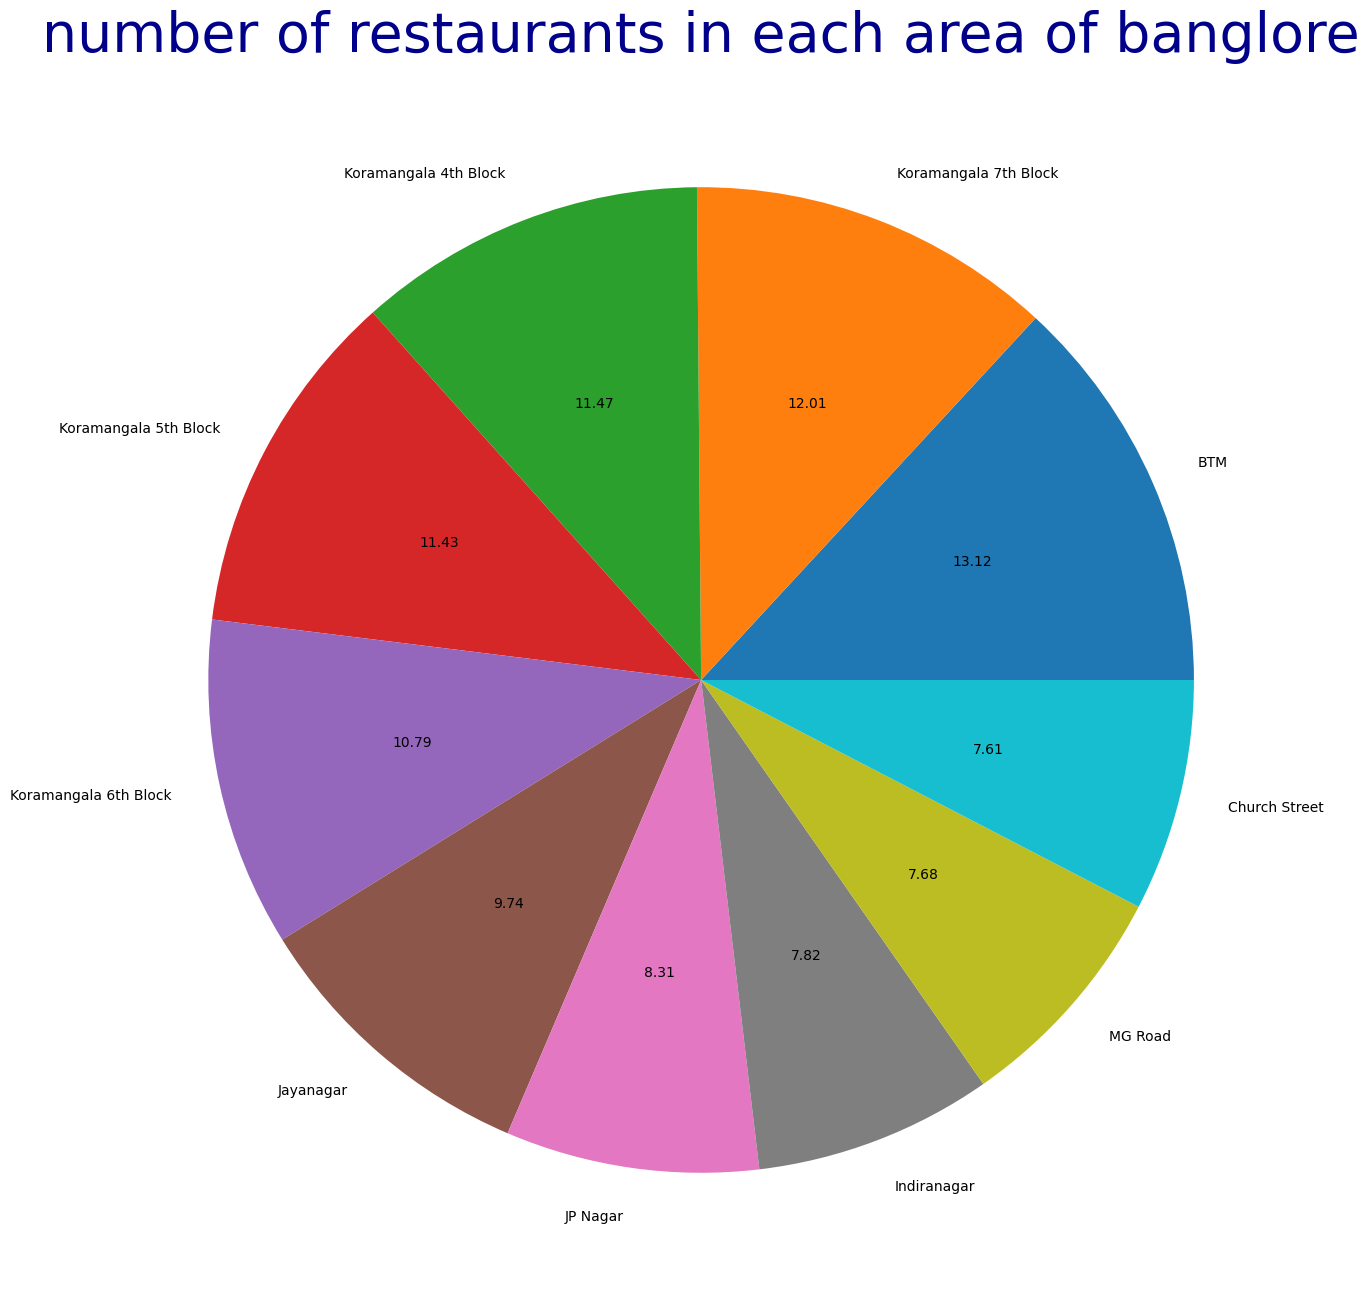

In [27]:
plt.figure(figsize=(16,16))

ax=df.city.value_counts()[:10]
labels=df['city'].value_counts()[:10].index
plt.pie(ax,labels=labels,autopct='%.2f')
plt.title('number of restaurants in each area of banglore',fontsize=40,color='darkblue')
plt.show()

TOP 10 location restaurants

<Axes: xlabel='city'>

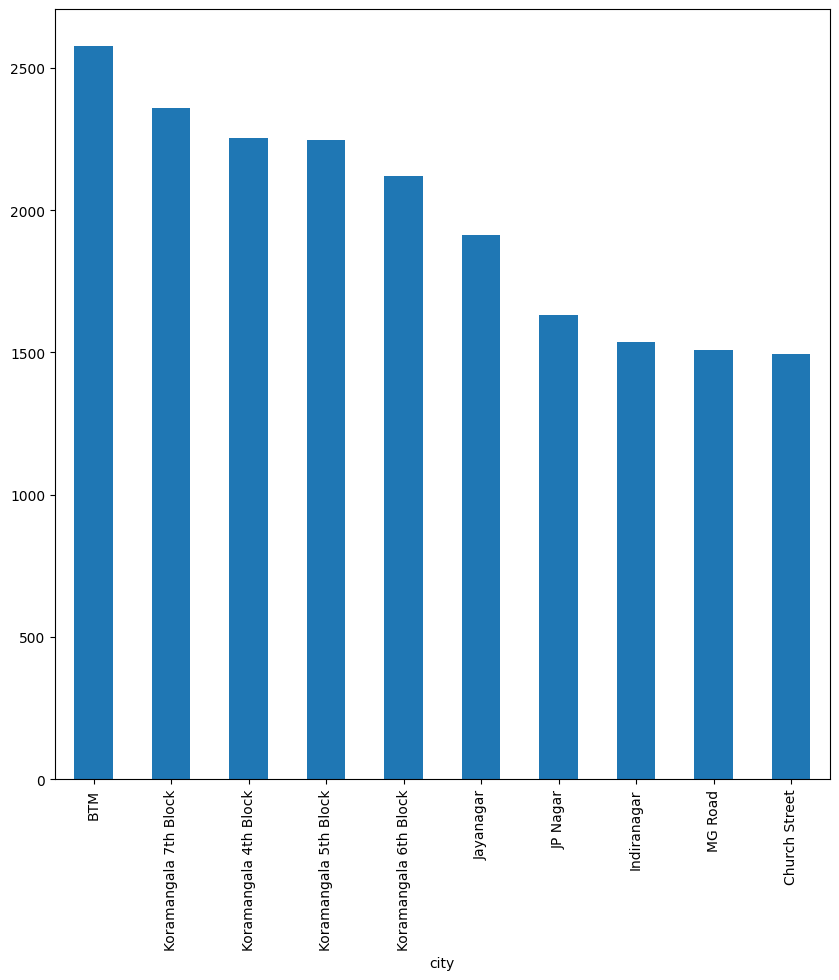

In [28]:
plt.figure(figsize=(10,10))
ax=df.city.value_counts()[:10]
ax.plot(kind='bar')

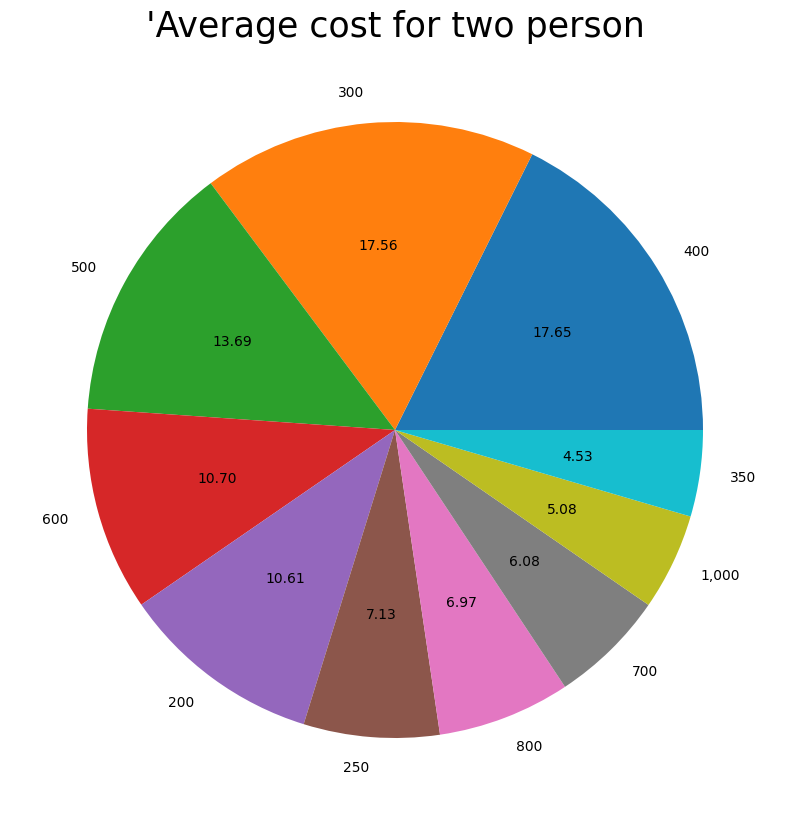

In [29]:
plt.figure(figsize=(10,10))
ax=df.avg_cost.value_counts()[:10]
label=df['avg_cost'].value_counts()[:10].index

plt.pie(ax,labels=label,autopct='%.2f')

plt.title("'Average cost for two person",fontsize=25)
plt.show()

In [30]:
###now we have to consider what i dependent and independent feature

In [57]:
##now drop null values
df.dropna(subset=['avg_cost','rest_type','location','cuisines','rate'],inplace=True)

In [62]:
df.isnull().sum()

online_order        0
book_table          0
rate                0
votes               0
location            0
rest_type           0
dish_liked      17968
cuisines            0
avg_cost            0
meal_type           0
city                0
dtype: int64

In [59]:
df

,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,avg_cost,meal_type,city
0,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet,Banashankari
2,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet,Banashankari
4,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...
51709,No,No,3.7,34,Whitefield,"Casual Dining, Bar",NaN,"North Indian, Continental",800,Pubs and bars,Whitefield
51711,No,No,2.5,81,Whitefield,"Casual Dining, Bar","Biryani, Andhra Meal","Andhra, South Indian, Chinese, North Indian",800,Pubs and bars,Whitefield
51712,No,No,3.6,27,Whitefield,Bar,NaN,Continental,"1,500",Pubs and bars,Whitefield
51715,No,Yes,4.3,236,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500",Pubs and bars,Whitefield


## lets convert categorical data to numerical data


In [49]:
x=df.drop(labels=['rate'],axis=1,inplace=False)

In [33]:
y=df['rate']

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,ridge_regression,Lasso

In [35]:
label=LabelEncoder()


In [68]:
list1=['online_order','book_table','rest_type','cuisines','avg_cost','city','location','dish_liked','meal_type']
for i in list1:
    x[i]=label.fit_transform(x[i])

x.head()


,online_order,book_table,votes,location,rest_type,dish_liked,cuisines,avg_cost,meal_type,city
0,1,1,775,1,24,3604,1894,59,0,1
1,1,0,787,1,24,2930,816,59,0,1
2,1,0,918,1,19,1398,653,59,0,1
3,0,0,88,1,73,2732,2221,39,0,1
4,0,0,166,4,24,3412,1921,53,0,1


In [69]:
x.head()

,online_order,book_table,votes,location,rest_type,dish_liked,cuisines,avg_cost,meal_type,city
0,1,1,775,1,24,3604,1894,59,0,1
1,1,0,787,1,24,2930,816,59,0,1
2,1,0,918,1,19,1398,653,59,0,1
3,0,0,88,1,73,2732,2221,39,0,1
4,0,0,166,4,24,3412,1921,53,0,1


In [70]:
x

,online_order,book_table,votes,location,rest_type,dish_liked,cuisines,avg_cost,meal_type,city
0,1,1,775,1,24,3604,1894,59,0,1
1,1,0,787,1,24,2930,816,59,0,1
2,1,0,918,1,19,1398,653,59,0,1
3,0,0,88,1,73,2732,2221,39,0,1
4,0,0,166,4,24,3412,1921,53,0,1
...,...,...,...,...,...,...,...,...,...,...
51709,0,0,34,88,25,5194,1785,59,6,29
51711,0,0,81,88,25,260,101,59,6,29
51712,0,0,27,88,6,5194,866,9,6,29
51715,0,1,236,26,6,1553,1207,26,6,29


In [72]:
y

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51709    3.7
51711    2.5
51712    3.6
51715    4.3
51716    3.4
Name: rate, Length: 41186, dtype: float64

In [73]:
x.dtypes

online_order    int64
book_table      int64
votes           int64
location        int64
rest_type       int64
dish_liked      int64
cuisines        int64
avg_cost        int64
meal_type       int32
city            int64
dtype: object

In [74]:
scaler=StandardScaler()
scaler.fit_transform(x)

array([[ 0.72317489,  2.35870854,  0.47867334, ...,  1.21390202,
        -2.39874121, -1.60186763],
       [ 0.72317489, -0.42396082,  0.49225587, ...,  1.21390202,
        -2.39874121, -1.60186763],
       [ 0.72317489, -0.42396082,  0.64053181, ...,  1.21390202,
        -2.39874121, -1.60186763],
       ...,
       [-1.38279138, -0.42396082, -0.36797097, ..., -1.72493725,
         2.72864904,  1.78075343],
       [-1.38279138,  2.35870854, -0.13140859, ..., -0.72573189,
         2.72864904,  1.78075343],
       [-1.38279138, -0.42396082, -0.38381725, ..., -1.72493725,
         2.72864904,  1.78075343]])

In [75]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.10,random_state=42)

In [76]:
X_train

,online_order,book_table,votes,location,rest_type,dish_liked,cuisines,avg_cost,meal_type,city
16203,1,0,119,22,73,2778,2208,30,2,10
44946,1,0,262,61,83,904,1524,46,2,25
1753,0,0,48,29,24,2430,1832,59,2,2
52,0,0,345,1,37,2331,1302,46,2,1
8022,1,0,353,88,24,1236,1623,56,4,6
...,...,...,...,...,...,...,...,...,...,...
7824,0,0,29,9,73,5194,2149,30,4,6
14285,0,0,124,19,77,883,2003,33,4,8
47807,0,0,57,14,86,1300,230,3,2,27
1009,1,1,199,29,73,3594,2037,56,2,2


In [77]:
## Linnear Regresion

In [78]:
from sklearn.linear_model import LinearRegression,ridge_regression,Lasso

In [79]:
reg=LinearRegression()
scaled_data=reg.fit(X_train,y_train)

In [80]:
pred_data=reg.predict(X_test)

In [81]:
from sklearn.metrics import r2_score
predict_data=r2_score(y_test,pred_data)*100
print("Accuracy score for LR :",predict_data)

Accuracy score for LR : 33.0409578043254


## Ridge

In [87]:
from sklearn.linear_model import Ridge
rr=Ridge()

In [89]:
x_scaled=rr.fit(X_train,y_train)

In [90]:
x_pred1=rr.predict(X_test)

In [91]:
from sklearn.metrics import r2_score
predict_data1=r2_score(y_test,x_pred1)*100
print("Accuricy score: ",predict_data1)

Accuricy score:  33.040915431357035


## Lasso

In [93]:
from sklearn.linear_model import Lasso
ls=Lasso()

In [95]:
x_scaled_1=ls.fit(X_train,y_train)

In [96]:
predict2=ls.predict(X_test)

In [99]:
predict_data_2=r2_score(y_test,predict2)*100
print("accuricy score for lasso is:",predict_data_2)

accuricy score for lasso is: 26.116079216279154


##SVM

In [102]:
from sklearn.svm import SVR
svr=SVR()

In [103]:
trained_data=svr.fit(X_train,y_train)

In [110]:
pred_3=svr.predict(X_test)

In [111]:
predict_data_3=r2_score(y_test,pred_3)*100
print("accuricy_score of svm is:",predict_data_3)


accuricy_score of svm is: 38.549352463810706


In [124]:
from sklearn.ensemble import RandomForestRegressor
reg=RandomForestRegressor()

In [126]:
scaled_train=reg.fit(X_train,y_train)

In [127]:
predict_reg=reg.predict(X_test)

In [134]:
predict_data_4=r2_score(y_test,predict_reg)*100
print("my accuricy score is:",predict_data_4)

my accuricy score is: 93.4526731107197


In [137]:
pd.DataFrame({"Model Names":['Linear Reg','Ridge Reg','Lasso Reg','Support Vector Reg','RandomForest Reg'],
            "Accuracy socre":[predict_data,predict_data1,predict_data_2,predict_data_3,predict_data_4]})

,Model Names,Accuracy socre
0,Linear Reg,33.040958
1,Ridge Reg,33.040915
2,Lasso Reg,26.116079
3,Support Vector Reg,38.549352
4,RandomForest Reg,93.452673


## We see that Randomforest give the best accuracy

In [138]:
x

,online_order,book_table,votes,location,rest_type,dish_liked,cuisines,avg_cost,meal_type,city
0,1,1,775,1,24,3604,1894,59,0,1
1,1,0,787,1,24,2930,816,59,0,1
2,1,0,918,1,19,1398,653,59,0,1
3,0,0,88,1,73,2732,2221,39,0,1
4,0,0,166,4,24,3412,1921,53,0,1
...,...,...,...,...,...,...,...,...,...,...
51709,0,0,34,88,25,5194,1785,59,6,29
51711,0,0,81,88,25,260,101,59,6,29
51712,0,0,27,88,6,5194,866,9,6,29
51715,0,1,236,26,6,1553,1207,26,6,29


##so we can easily predict the rating

In [140]:
reg.predict([[1,0,13,73,1900,350,27,78,48,190]])

d:\zomato_rating_prediction\env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([3.421])